<a href="https://colab.research.google.com/github/stephtavzz/challenge-alura-store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58



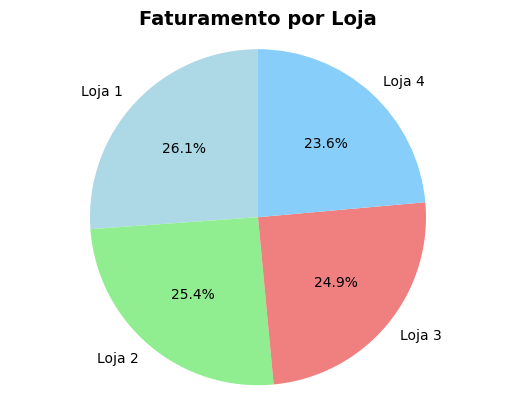

In [ ]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

faturamento = {}

for i in range(len(lojas)):
    faturamento[nomes_lojas[i]] = lojas[i]['Preço'].sum()

# Imprimindo o resultado
for nome_loja, total in faturamento.items():
    print(f'{nome_loja}: R$ {total:,.2f}')

print()

plt.pie(faturamento.values(), labels=faturamento.keys(), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

plt.title('Faturamento por Loja', fontsize=14, weight='bold')

plt.axis('equal')
plt.show()

# 2. Vendas por Categoria


In [ ]:
vendas_categoria = [loja['Categoria do Produto'].value_counts() for loja in lojas]

vendas_por_categoria = {nomes_lojas[i]: vendas_categoria[i] for i in range(len(nomes_lojas))}

tabela_vendas = pd.DataFrame(vendas_por_categoria).fillna(0).astype(int)

print('\nVendas por Categoria por Loja:\n')

for categoria in tabela_vendas.index:
    print(f'{categoria.capitalize()}:')
    for loja in tabela_vendas.columns:
        print(f'  {loja}: {tabela_vendas.loc[categoria, loja]}')
    print()


Vendas por Categoria por Loja:

Brinquedos:
  Loja 1: 324
  Loja 2: 313
  Loja 3: 315
  Loja 4: 338

Eletrodomesticos:
  Loja 1: 312
  Loja 2: 305
  Loja 3: 278
  Loja 4: 254

Eletronicos:
  Loja 1: 448
  Loja 2: 422
  Loja 3: 451
  Loja 4: 451

Esporte e lazer:
  Loja 1: 284
  Loja 2: 275
  Loja 3: 277
  Loja 4: 277

Instrumentos musicais:
  Loja 1: 182
  Loja 2: 224
  Loja 3: 177
  Loja 4: 170

Livros:
  Loja 1: 173
  Loja 2: 197
  Loja 3: 185
  Loja 4: 187

Moveis:
  Loja 1: 465
  Loja 2: 442
  Loja 3: 499
  Loja 4: 480

Utilidades domesticas:
  Loja 1: 171
  Loja 2: 181
  Loja 3: 177
  Loja 4: 201



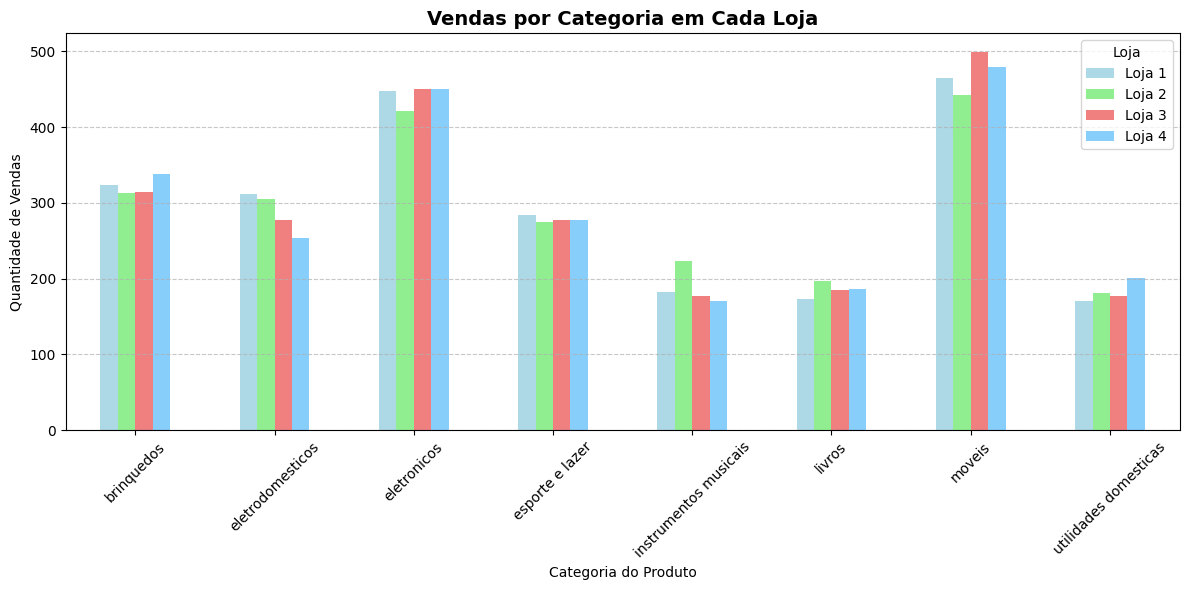

In [ ]:
tabela_vendas.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

plt.title('Vendas por Categoria em Cada Loja', fontsize=14, weight='bold')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Média de Avaliação das Lojas

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00



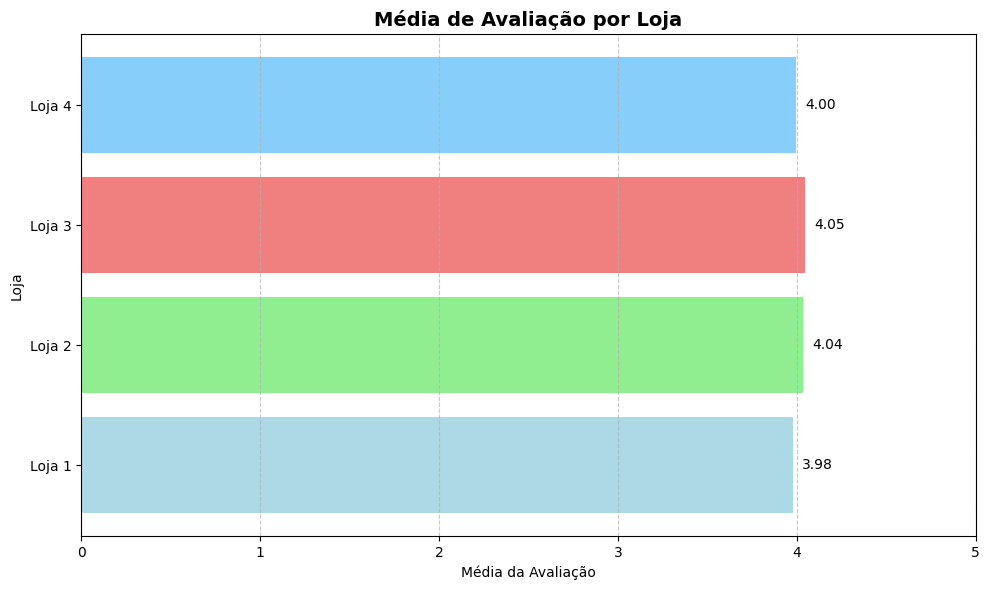

In [ ]:
media_avaliacao = {}

for i in range(len(lojas)):
    media_avaliacao[nomes_lojas[i]] = lojas[i]['Avaliação da compra'].mean().item()

for nome_loja, total in media_avaliacao.items():
    print(f'{nome_loja}: {total:,.2f}')

print()

plt.figure(figsize=(10, 6))
cores = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']  # Cores personalizadas para as barras

plt.barh(list(media_avaliacao.keys()), list(media_avaliacao.values()), color=cores)

plt.title('Média de Avaliação por Loja', fontsize=14, weight='bold')
plt.xlabel('Média da Avaliação')
plt.ylabel('Loja')
plt.xlim(0, 5)  # Avaliação vai de 0 a 5
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando os valores à direita das barras
for i, valor in enumerate(media_avaliacao.values()):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Calculando as vendas por produto para cada loja
vendas_produtos = [loja['Produto'].value_counts() for loja in lojas]

# Criando o dicionário com os nomes das lojas e suas vendas por produto
vendas_por_produtos = {nomes_lojas[i]: vendas_produtos[i] for i in range(len(nomes_lojas))}

# Construindo a mensagem para exibir o produto mais e menos vendido de cada loja
resultado = ""

for nome_loja, produtos in vendas_por_produtos.items():
    produto_mais_vendido = produtos.index[0]
    produto_menos_vendido = produtos.index[-1]
    resultado += f'{nome_loja} - Produto mais vendido: {produto_mais_vendido}\n'
    resultado += ' ' * 9 + f'Produto menos vendido: {produto_menos_vendido}\n'
    resultado += '\n'

# Exibindo o resultado
print(resultado)


Loja 1 - Produto mais vendido: Micro-ondas
         Produto menos vendido: Celular ABXY

Loja 2 - Produto mais vendido: Iniciando em programação
         Produto menos vendido: Jogo de tabuleiro

Loja 3 - Produto mais vendido: Kit banquetas
         Produto menos vendido: Blocos de montar

Loja 4 - Produto mais vendido: Cama box
         Produto menos vendido: Guitarra




# 5. Frete Médio por Loja


Tabela de Frete Médio por Loja:

Loja 1: 34.69
Loja 2: 33.62
Loja 3: 33.07
Loja 4: 31.28



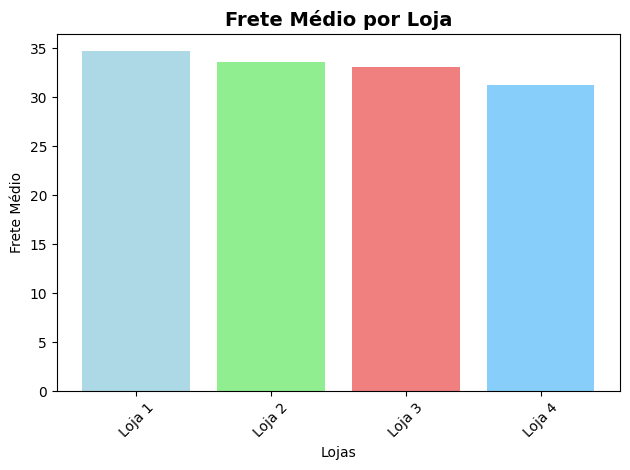

In [ ]:
# Calculando o frete médio por loja
media_frete = {}

for i in range(len(lojas)):
    media_frete[nomes_lojas[i]] = lojas[i]['Frete'].mean().item()

# Exibindo os resultados de forma simples
print('Tabela de Frete Médio por Loja:\n')

for nome_loja, frete in media_frete.items():
    print(f'{nome_loja}: {frete:,.2f}')

print()

# Criando gráfico de barras para frete médio por loja
plt.bar(media_frete.keys(), media_frete.values(), color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

plt.title('Frete Médio por Loja', fontsize=14, weight='bold')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Relatório**

Para iniciar um novo empreendimento, o Senhor João precisa decidir qual das quatro unidades da rede Alura Store vender. A escolha deve ser baseada em dados concretos que apontem qual loja apresenta menor eficiência em termos de faturamento, desempenho de vendas, avaliações de clientes e custos operacionais. Abaixo, seguem os principais indicadores analisados para cada loja:


- **Faturamento Total:** Loja 4 teve o menor faturamento (R$ 1.384.497,58), ficando atrás das demais;

- **Volume de Vendas por Categoria:** Loja 4 vendeu menos eletrodomésticos e instrumentos musicais, e teve desempenho mediano nas outras categorias;

- **Média de Avaliação dos Clientes:** Loja 4 teve média de 4,00, abaixo das lojas 2 (4,04) e 3 (4,05);

- **Produto Mais e Menos Vendido:** Apesar de vender bem camas box, a Loja 4 tem como produto menos vendido uma guitarra — o que pode indicar baixa diversidade de interesse em certas categorias;

- **Frete Médio:** Loja 4 tem o menor custo médio de frete (R$ 31,28), o que é positivo, mas não suficiente para compensar os demais pontos fracos.


### **Recomendação Final:**


Com base nos dados apresentados, a Loja 4 é a menos eficiente da rede, apresentando o menor faturamento, avaliações medianas e desempenho mais fraco em categorias relevantes. Apesar do frete médio mais baixo, isso não compensa os resultados inferiores em outras métricas essenciais. Portanto, recomenda-se que o Senhor João venda a Loja 4 para concentrar esforços nas unidades mais rentáveis e com melhor desempenho.

